# `GRIP @The Sparks Foundation`

## <u>Prediction using Unsupervised ML<u>

#### Importing requisite libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Mounting at google drive for accessing the CSV file**

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Reading the csv file

In [8]:
df = pd.read_csv(r"/content/drive/MyDrive/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Dropping the unnecessary  column

In [9]:
df.drop('Id',axis=1,inplace=True)

#### Data frame shape

In [10]:
df.shape

(150, 5)

#### Checking the null values if any

In [11]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Checking the duplicated values

In [12]:
df.duplicated().sum()

3

#### Data information

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Descriptive Statistics of the Iris Dataset

In [14]:
df.describe

<bound method NDFrame.describe of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]>

### Exploratory Data Analysis

#### Heatmap : It shows how the input variables are correlated with eachother

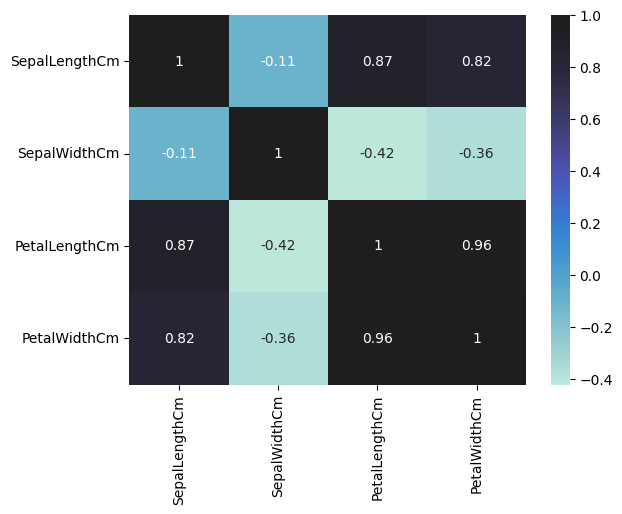

In [15]:
sns.heatmap(df.corr(),annot=True,center=1)
plt.show()

#### Pairplot: It shows the scatter-plot of input variables with eachother and also shows their distribution

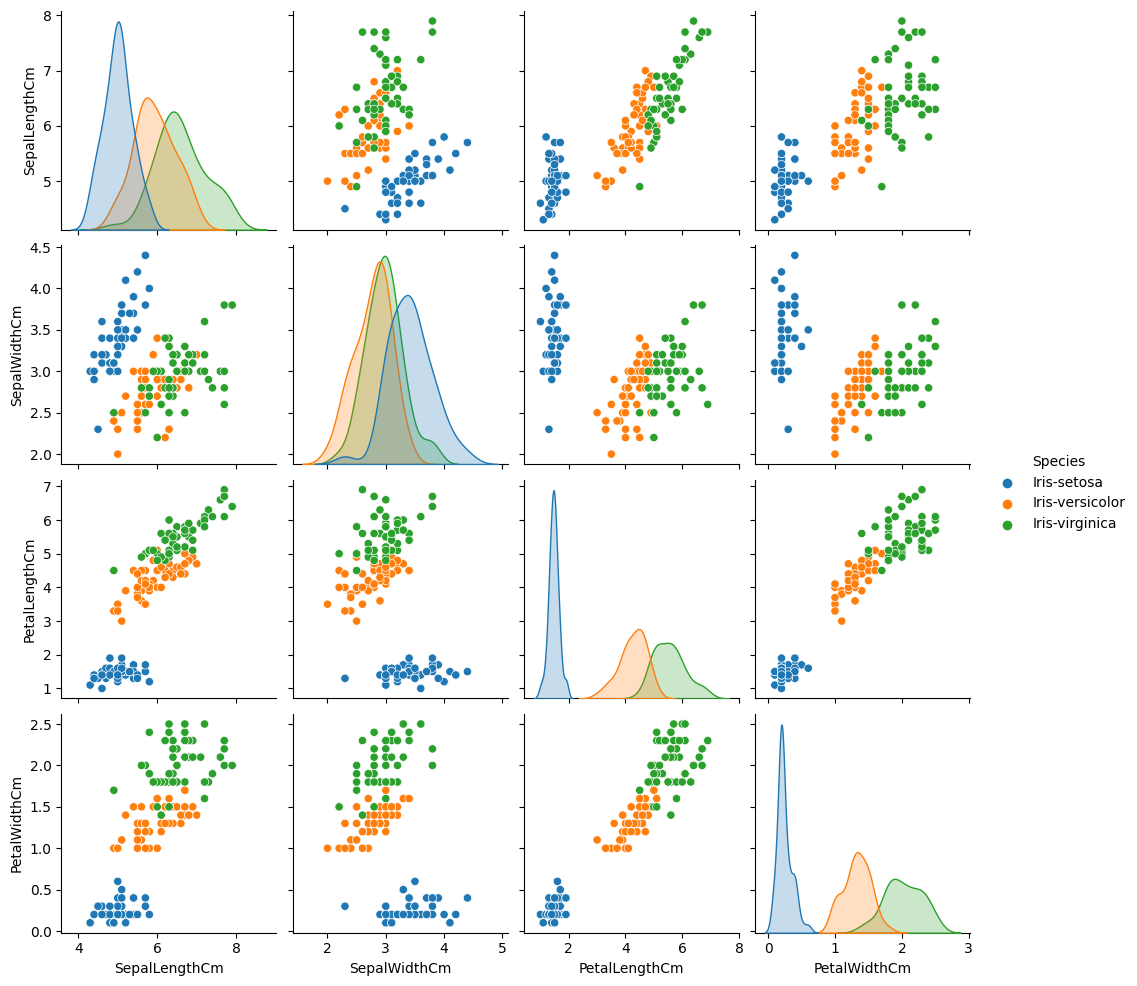

In [16]:
sns.pairplot(df,hue='Species')
plt.show()

#### Probability distribution of Sepal Width among all the three species

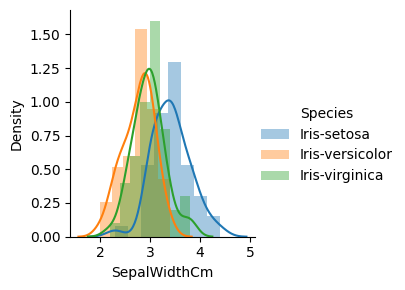

In [17]:
sns.FacetGrid(df,hue="Species") \
    .map(sns.distplot,"SepalWidthCm") \
    .add_legend()
plt.show()

#### Probability distribution of Sepal Length among all the three species

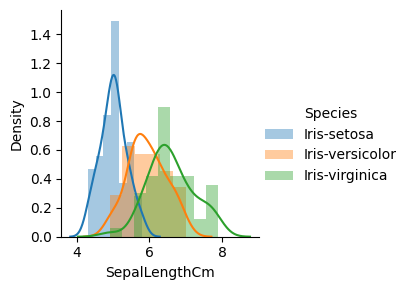

In [18]:
sns.FacetGrid(df,hue="Species") \
    .map(sns.distplot,"SepalLengthCm") \
    .add_legend()
plt.show()

####  Probability distribution of Petal Width among all the three species

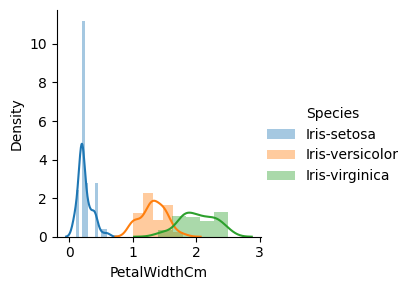

In [19]:
sns.FacetGrid(df,hue="Species") \
    .map(sns.distplot,"PetalWidthCm") \
    .add_legend()
plt.show()

####  Probability distribution of Petal Length among all the three species

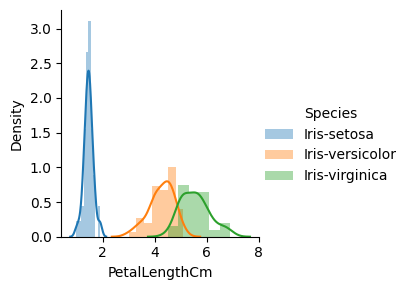

In [20]:
sns.FacetGrid(df,hue="Species") \
    .map(sns.distplot,"PetalLengthCm") \
    .add_legend()
plt.show()

### Building the model

#### Importing the necessary functions of SciKIt Learn 

In [21]:
from sklearn.cluster import KMeans

#### Defining the Input and output variable

In [22]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

#### Implementation:

#### First we need to find out the optimum of number clusters

In order to do that first of all we run the model on different number of clusters and calculate the WCSS. WCSS stands for "Within Cluster Sum of Squares", it tells the squared distance between the each point and assigned cluster's centroid. After whichever number of clusters, the WCSS stops declining significantly, that number of clusters is considered to be optimum
    

In [23]:
WCSS = []
for i in range(1,10):
    model = KMeans(n_clusters=i)
    model.fit(X)
    WCSS.append(model.inertia_)
print(WCSS)  

[680.8244000000001, 152.36870647733906, 78.940841426146, 57.34540931571814, 46.53558205128205, 38.93873974358975, 34.332858416945385, 29.955568877177583, 27.83959113693325]


**In the below graph, as the number of clusters incresing, WCSS is decresing but after certain no. of clusters, the rate of decrement in WCSS slows down. This point is called elbow-point. In our case, it's three so optimun number of clusters should be three.**

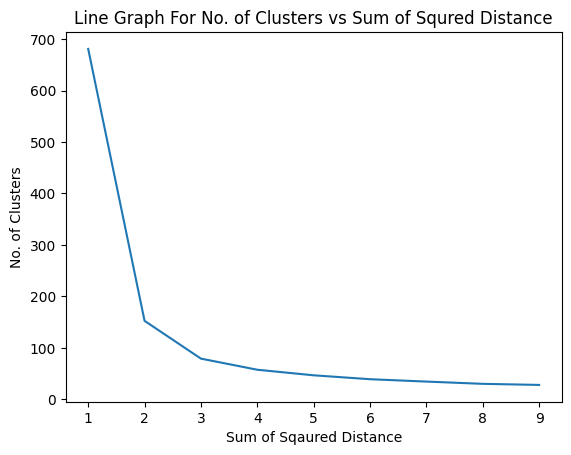

In [24]:
plt.plot(range(1,10),WCSS)
plt.title("Line Graph For No. of Clusters vs Sum of Squred Distance")
plt.xlabel("Sum of Sqaured Distance")
plt.ylabel("No. of Clusters")
plt.show()

**Now as we know the optimum number of clusters, we need to fit the model and make predictions**

In [25]:
KM = KMeans(n_clusters=3)
df['pred'] = KM.fit_predict(X)

We need to create the scatterplot so we can visualise the clusters

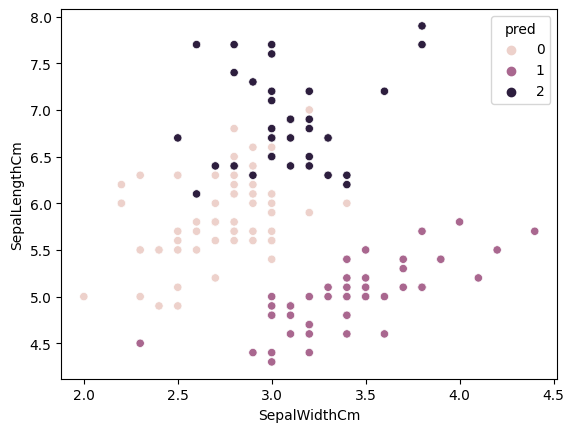

In [26]:
sns.scatterplot(data=df,x='SepalWidthCm',y='SepalLengthCm',hue='pred',cmap='viridis')
plt.show()

**Next, we need to evaluate our model. In K-means clustering, we have silhouette_score which tells us that how well it has classified our data points**

In [27]:
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(X,KM.labels_)
print("The silhouette_score is :", silhouette)

The silhouette_score is : 0.5525919445499757
